In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Exploration and Cleaning

In [269]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
df_train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [5]:
df_train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


### Handle Null Values

In [101]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
belongs_to_collection,2396,0.798667
homepage,2054,0.684667
tagline,597,0.199000
Keywords,276,0.092000
production_companies,156,0.052000
production_countries,55,0.018333
spoken_languages,20,0.006667
crew,16,0.005333
cast,13,0.004333
overview,8,0.002667


We don't mind about any of these missing values, except for runtime.

In [104]:
df_train.loc[pd.isnull(df_train['runtime'])][['original_title','popularity','runtime','revenue']]

,original_title,popularity,runtime,revenue
1335,Королёв,0.292296,NaN,31000
2302,Happy Weekend,0.002229,NaN,65335


In [275]:
# let's just remove those 2 rows
df_train = df_train.loc[~pd.isnull(df_train['runtime'])]

### Analysis of Target Variable

In [4]:
df_train['revenue'].describe()

count    3.000000e+03
mean     6.672585e+07
std      1.375323e+08
min      1.000000e+00
25%      2.379808e+06
50%      1.680707e+07
75%      6.891920e+07
max      1.519558e+09
Name: revenue, dtype: float64

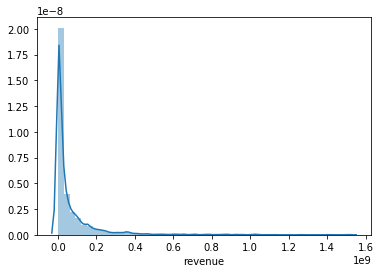

In [7]:
sns.distplot(df_train['revenue']);

In [8]:
print("Skewness: %f" % df_train['revenue'].skew())
print("Kurtosis: %f" % df_train['revenue'].kurt())

Skewness: 4.542285
Kurtosis: 27.782549


Positively skewed distribution; let's try transforming the target.

Skewness: -0.010125
Kurtosis: -0.366158


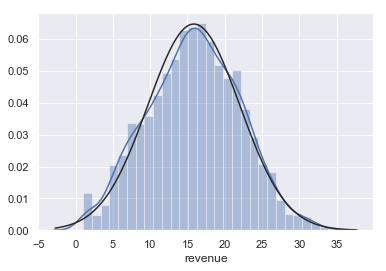

In [138]:
target = np.power(df_train['revenue'],1/6)
sns.distplot(target, fit=norm);
print("Skewness: %f" % target.skew())
print("Kurtosis: %f" % target.kurt())

In [274]:
df_train['revenue_adjusted'] = np.power(df_train['revenue'],1/6)

### Derived Covariates

Some of the columns in this data set are not numerical or not useful in their current form, but could be with some transformations. 

In [36]:
df_train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

Ideas for some derived variables

1. series_member: can convert "belongs_to_collection" to a boolean (null, or not null)
2. genres will need to be one-hot encoded
3. original_language can be one-hot encoded (or maybe just english and non-english?)
4. production_companies can potentially be one-hot encoded for a few big names (Paramount, Disney, NaN)
5. production_countries can be one-hot encoded (maybe just US, non-US?)
6. release date: maybe convert to just year?
7. spoken_languages: could do number of languages, english boolean?
8. one-hot encoding of Keywords?

In [270]:
# series_member
df_train['series_member'] = df_train['belongs_to_collection'].isnull().astype(int)
df_test['series_member'] = df_test['belongs_to_collection'].isnull().astype(int)

# genres one-hot encoding
genre_list = ['Music','Romance','Drama','Adventure','Animation','Action','Comedy','Crime','Family','Documentary',
             'Thriller','Foreign','Horror','History','Science Fiction','Mystery','Fantasy','War','Western']
for g in genre_list:
    df_train['genre_'+g] = df_train['genres'].fillna('').str.contains(g).astype(int)
    df_test['genre_'+g] = df_test['genres'].fillna('').str.contains(g).astype(int)
    
# original_language one-hot encoding for english only
df_train['english'] = (df_train['original_language']=='en').astype(int)
df_test['english'] = (df_test['original_language']=='en').astype(int)

# release year
df_train['year'] = pd.to_datetime(df_train['release_date']).map(lambda x: x.year)
df_test['year'] = pd.to_datetime(df_test['release_date']).map(lambda x: x.year)

### Analysis of Covariates

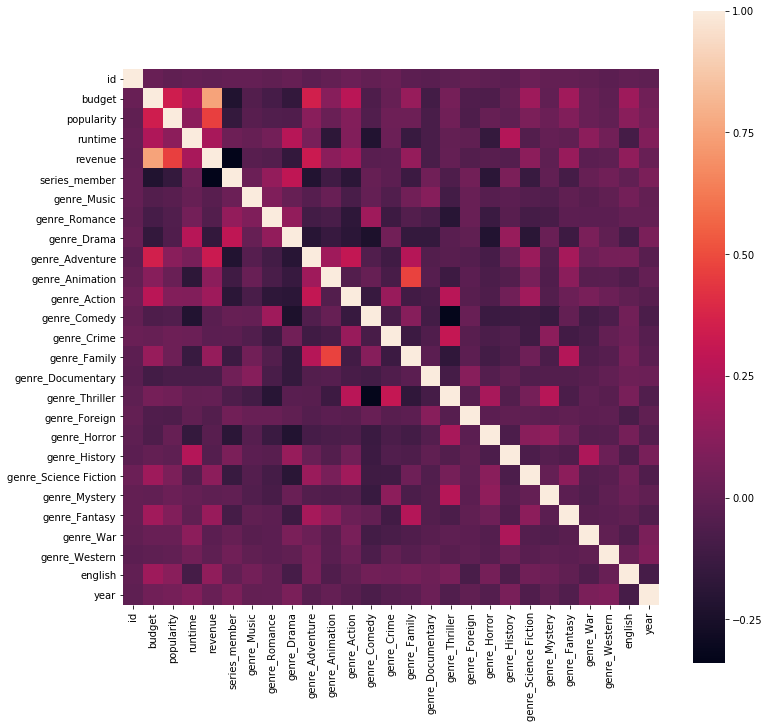

In [97]:
# correlation heatmap
corr = df_train.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, square=True);

Nothing problematic here. The highest correlation is actually budget and revenue.

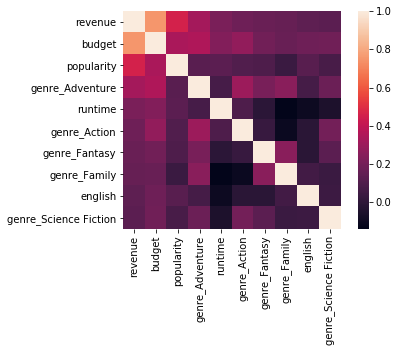

In [107]:
# correlations with revenue
k = 10
cols = corr.nlargest(k, 'revenue')['revenue'].index
cm = np.corrcoef(df_train[cols].values.T)
hm = sns.heatmap(cm, square=True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Let's go through the continuous covariates and see if there are some helpful transformations we can make.

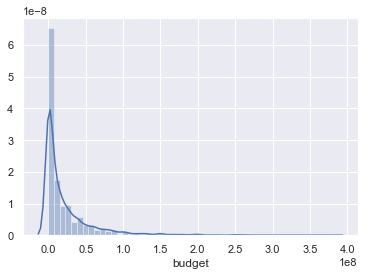

Skewness: 3.102430
Kurtosis: 13.219328


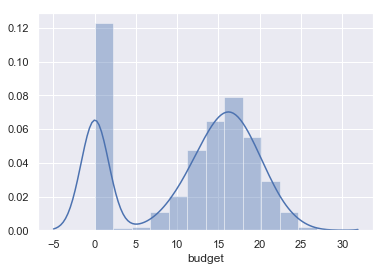

Skewness: -0.483251
Kurtosis: -1.213127


In [142]:
# budget
sns.distplot(df_train['budget'])
plt.show()
print("Skewness: %f" % df_train['budget'].skew())
print("Kurtosis: %f" % df_train['budget'].kurt())

test = np.power(df_train['budget'],1/6)
sns.distplot(test)
plt.show()
print("Skewness: %f" % test.skew())
print("Kurtosis: %f" % test.kurt())

In [271]:
df_train['budget_adjusted'] = np.power(df_train['budget'],1/6)
df_test['budget_adjusted'] = np.power(df_test['budget'],1/6)

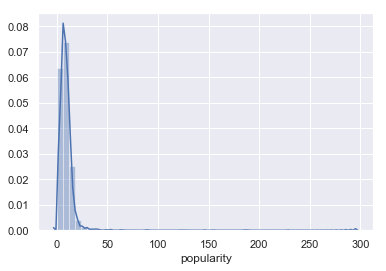

Skewness: 14.378255
Kurtosis: 280.067980


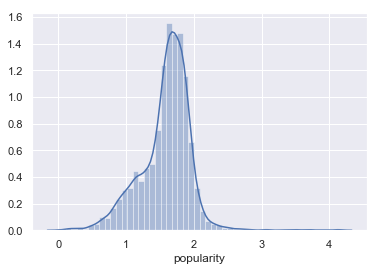

Skewness: -0.130011
Kurtosis: 3.930816


In [127]:
# popularity
sns.distplot(df_train['popularity'])
plt.show()
print("Skewness: %f" % df_train['popularity'].skew())
print("Kurtosis: %f" % df_train['popularity'].kurt())

test = np.power(df_train['popularity'],1/4)
sns.distplot(test)
plt.show()
print("Skewness: %f" % test.skew())
print("Kurtosis: %f" % test.kurt())

In [272]:
df_train['popularity_adjusted'] = np.power(df_train['popularity'],1/4)
df_test['popularity_adjusted'] = np.power(df_test['popularity'],1/4)

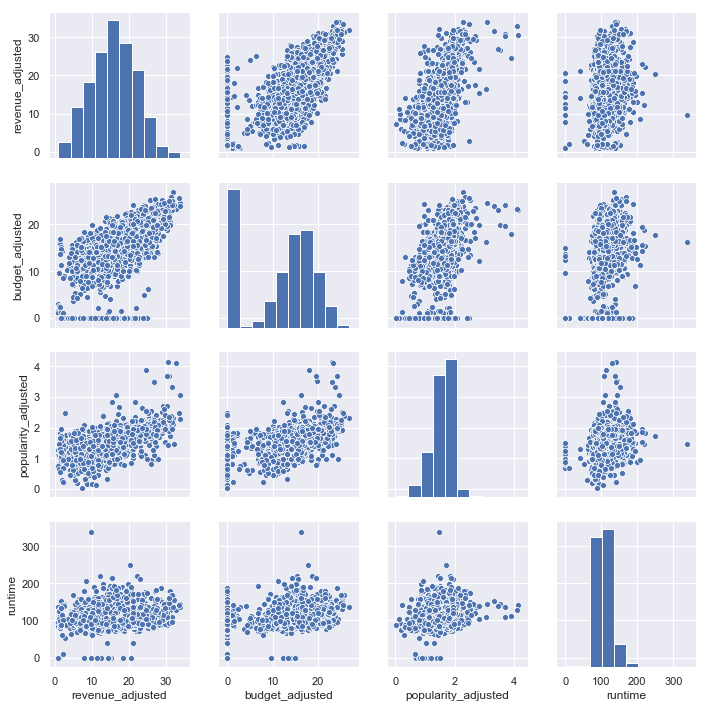

In [137]:
# scatterplots
sns.set()
cols = ['revenue_adjusted', 'budget_adjusted', 'popularity_adjusted', 'runtime']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

# Modeling

In [304]:
X_train = df_train[['budget_adjusted','popularity_adjusted','runtime','genre_Adventure','english']]
y_train = np.ravel(df_train[['revenue_adjusted']])

X_test = df_test[['budget_adjusted','popularity_adjusted','runtime','genre_Adventure','english']].fillna(0)

### Ridge and Lasso Regression

In [277]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics.scorer import make_scorer

def rmsle_cv(y_pred, y_true, **kwargs):
    return np.sqrt(np.mean(np.power(np.log1p(y_pred)-np.log1p(y_true), 2)))

rmsle_scorer = make_scorer(rmsle_cv, greater_is_better=False)

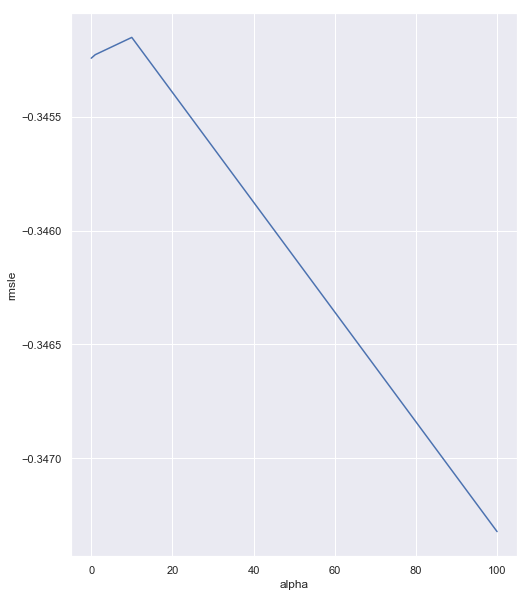

Minimum RMSLE: 0.3451507511374293


In [278]:
# Tune alpha in ridge regression
alphas = [0.01, 0.1, 1, 10, 100]
cv_ridge = [cross_val_score(Ridge(alpha = alpha), X_train, y_train, scoring=rmsle_scorer, cv=5).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot()
plt.xlabel("alpha")
plt.ylabel("rmsle")
plt.show()

print ('Minimum RMSLE: '+str(-cv_ridge.max()))

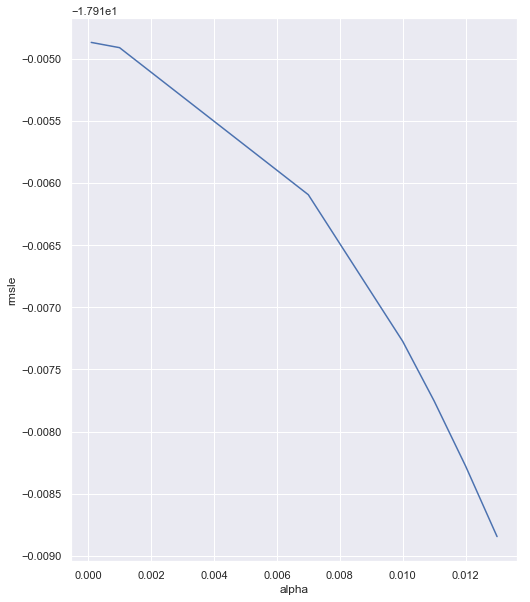

Minimum RMSLE: 17.914870512757055


In [347]:
# try lasso
alphas = [0.013, 0.012, 0.011, 0.01, 0.007, 0.001, 0.0001]
cv_lasso = [cross_val_score(Lasso(alpha = alpha), X_train, y_train, scoring='neg_mean_squared_error', cv=5).mean() 
            for alpha in alphas]

cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot()
plt.xlabel("alpha")
plt.ylabel("rmsle")
plt.show()

print ('Minimum RMSLE: '+str(-cv_lasso.max()))

We get slightly better performance from Ridge regression, with a RMSLE of 0.3451

In [348]:
# Note: Lasso model sets unimportant features' coefficients to 0. Check if there are any here
model_lasso = Lasso(alpha=0.0001).fit(X_train, y_train)
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print (coef.loc[coef==0])

Series([], dtype: float64)


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

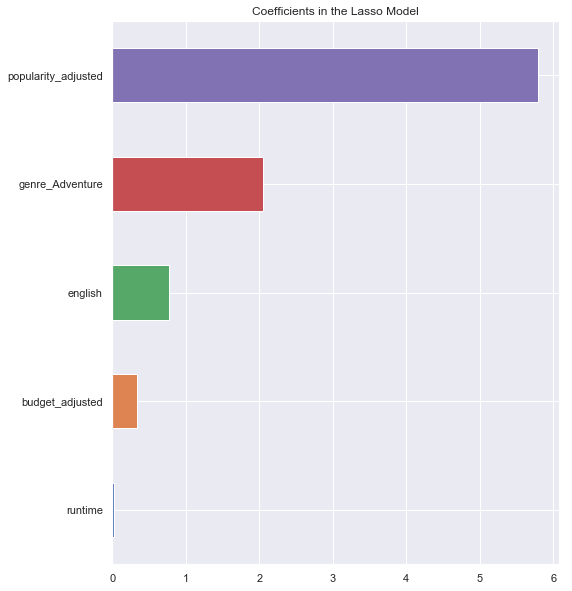

In [349]:
# Feature importances from Lasso
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

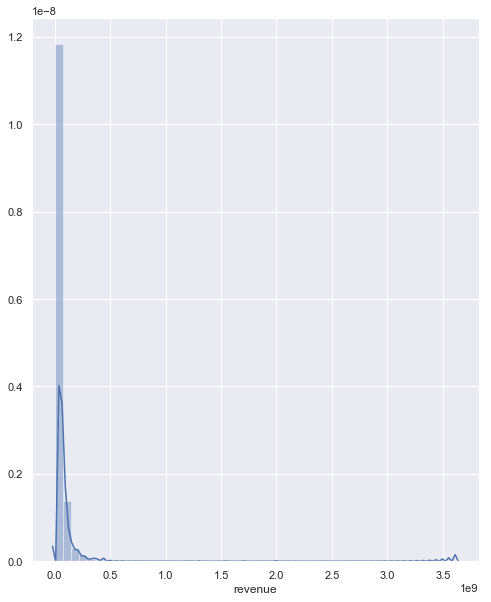

In [351]:
# get output predictions
df_out = pd.DataFrame({"id":df_test.id, "revenue":np.power(model_lasso.predict(X_test), 6)})

# check distribution, to make sure it's reasonable
sns.distplot(df_out['revenue'])
plt.show()

In [352]:
df_out.to_csv('data/submissions_lasso_1.csv', index=False, float_format='%d')

### XGBoost

In [266]:
import xgboost as xgb

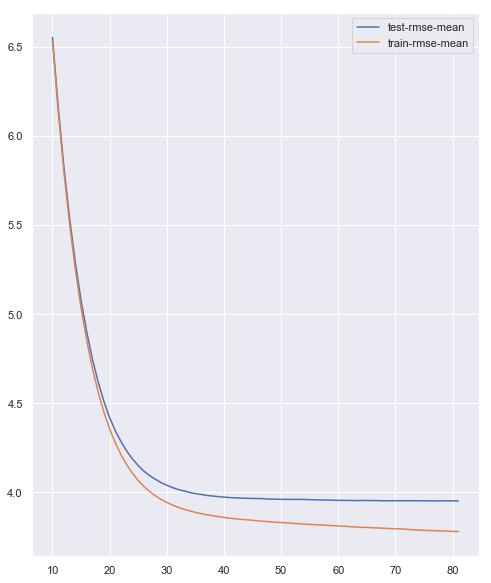

In [282]:
dtrain = xgb.DMatrix(X_train, label=y_train)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

model.loc[10:,["test-rmse-mean", "train-rmse-mean"]].plot();

In [316]:
model_xgb = xgb.XGBRegressor(n_estimators=100, max_depth=2, learning_rate=0.1)
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


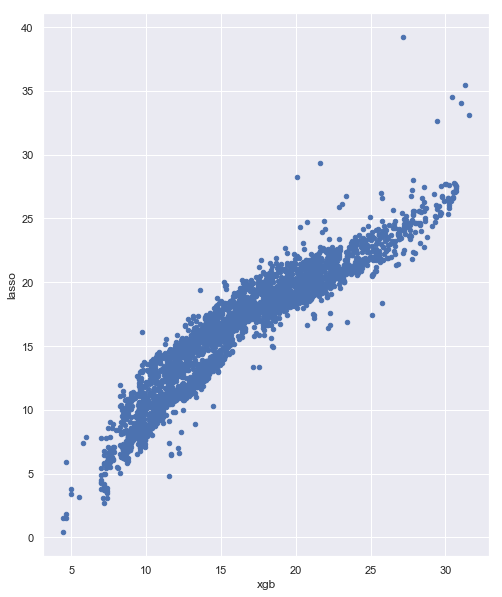

In [350]:
# compare predictions from XGB and Lasso models
xgb_preds = model_xgb.predict(X_test)
lasso_preds = model_lasso.predict(X_test)

predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter");

We have some outliers in predictions!

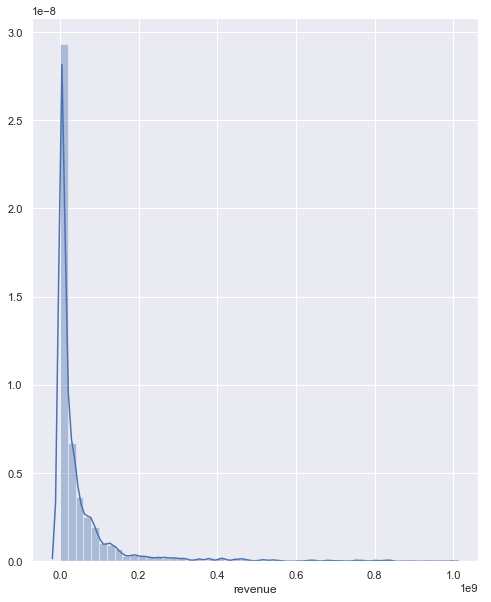

In [321]:
# get output predictions
df_out = pd.DataFrame({"id":df_test.id, "revenue":np.power(model_xgb.predict(X_test), 6)})

# check distribution, to make sure it's reasonable
sns.distplot(df_out['revenue'])
plt.show()

In [324]:
df_out.to_csv('data/submissions_xgb_1.csv', index=False, float_format='%d')

### Neural Network

In [328]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import randint as sp_randint

In [342]:
# Tune neural net parameters
nn_model = MLPRegressor(max_iter=10000, hidden_layer_sizes=(5,5), alpha=0.001)

param_dist = {
    'hidden_layer_sizes' : [(10,),(5,5),(10,10,10)]
}

random_search = GridSearchCV(nn_model, param_dist, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
random_search.fit(X_train, y_train)

report_cols = ['mean_test_score','std_test_score']+['param_'+param for param in param_dist]
report = pd.DataFrame(random_search.cv_results_)[report_cols].sort_values(by='mean_test_score', ascending=False)
report

,mean_test_score,std_test_score,param_hidden_layer_sizes
0,-16.589401,1.897767,"(10,)"
1,-17.021992,1.984696,"(5, 5)"
2,-17.330155,1.530994,"(10, 10, 10)"


In [338]:
model_mlp = MLPRegressor(max_iter=10000, hidden_layer_sizes=(5,5), alpha=0.001)
model_mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


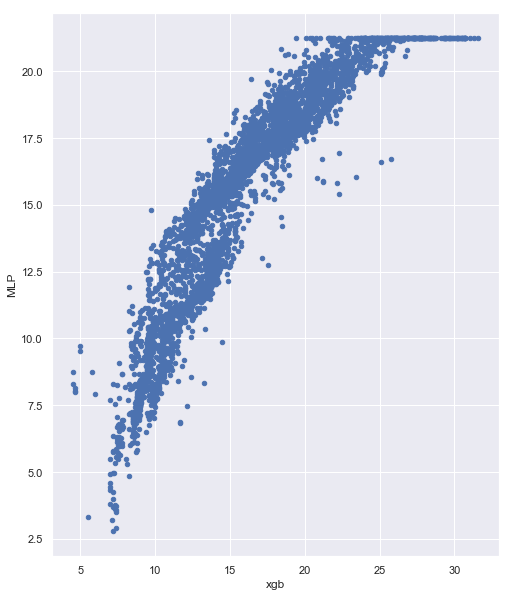

In [343]:
# compare predictions from XGB and NN models
xgb_preds = model_xgb.predict(X_test)
mlp_preds = model_mlp.predict(X_test)

predictions = pd.DataFrame({"xgb":xgb_preds, "MLP":mlp_preds})
predictions.plot(x = "xgb", y = "MLP", kind = "scatter");

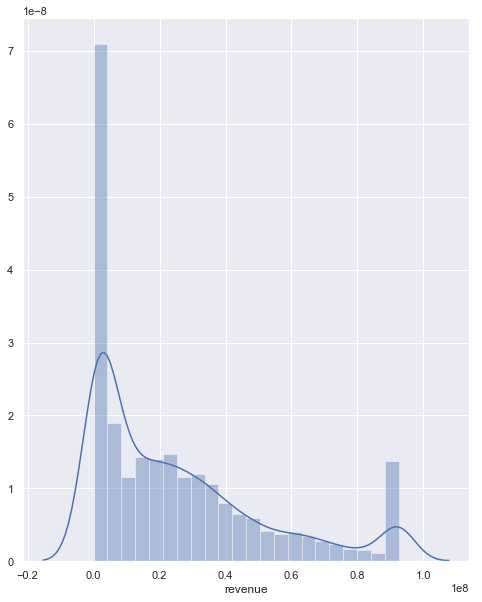

In [340]:
# get output predictions
df_out = pd.DataFrame({"id":df_test.id, "revenue":np.power(model_mlp.predict(X_test), 6)})

# check distribution, to make sure it's reasonable
sns.distplot(df_out['revenue'])
plt.show()

In [341]:
df_out.to_csv('data/submissions_mlp_1.csv', index=False, float_format='%d')